<a href="https://colab.research.google.com/github/Ahmad-Yas/AI4CCEE_Fall_2024/blob/main/mini_project/MiniProject_1/Submission/Ahmad_Yaseen_Mini_Project_REV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/drive/MyDrive/combined_accidents.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()


<ipython-input-2-e160de378d82>:5: DtypeWarning: Columns (40,42,62,64,84,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
0      1   Alabama    10001         2         1         1     0        1   
1      1   Alabama    10002         1         1         0     0        2   
2      1   Alabama    10003         2         2         0     0        2   
3      1   Alabama    10004         1         1         0     0        2   
4      1   Alabama    10005         2         2         0     0        2   

   PERMVIT  PERNOTMVIT  ...  HOSP_MN                        HOSP_MNNAME   CF1  \
0        1           0  ...       88   Not Applicable (Not Transported)   0.0   
1        2           0  ...       88   Not Applicable (Not Transported)  20.0   
2        2           0  ...       99  Unknown EMS Hospital Arrival Time   0.0   
3        2           0  ...       88   Not Applicable (Not Transported)   0.0   
4        2           0  ...       88   Not Applicable (Not Transported)   0.0   

                   CF1NAME  CF2  CF2NAME  CF3 CF3NAME  FATALS  DRUNK_DR  
0                      NaN  0.0      NaN  0.0     NaN       1       0.0  
1  Police Pursuit Involved  0.0      NaN  0.0     NaN       2       0.0  
2                      NaN  0.0      NaN  0.0     NaN       1       0.0  
3                      NaN  0.0      NaN  0.0     NaN       1       0.0  
4                      NaN  0.0      NaN  0.0     NaN       1       0.0  

[5 rows x 91 columns]

In [25]:
# Check for relevant columns that could indicate road types (arterial road)
# and extract the fatality information for these specific roads

# List all columns to search for useful road type information
iowa_data.columns


Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [26]:
!pip install --upgrade pysal esda

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 59.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.4/347.4 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/4

In [27]:
# Filter Iowa data for arterial roads using the 'FUNC_SYS' column with values [1, 2, 3, 4]
iowa_arterial_data = iowa_data[iowa_data['FUNC_SYS'].isin([1, 2, 3, 4])]

# Display the filtered data to the user using IPython.display
from IPython.display import display
display(iowa_arterial_data)

# Alternatively, print the head of the DataFrame
print(iowa_arterial_data.head())

#  Filter for Iowa data (STATE == 19)
iowa_data = data[data['STATE'] == 19]

# Filter for arterial roads (FUNC_SYS values [1, 2, 3, 4])
# FUNC_SYS corresponds to functional road classes from your image:
# 1: Interstate, principal arterial
# 2: Freeway and expressway, principal arterial
# 3: Principal arterial, other
# 4: Minor arterial
iowa_arterial_data = iowa_data[iowa_data['FUNC_SYS'].isin([1, 2, 3, 4])]

# Display the filtered DataFrame (optional)
print("Filtered Iowa Arterial Roads Data:")
display(iowa_arterial_data)

# Step 7: Calculate the total fatalities on these arterial roads
total_fatalities_arterial = iowa_arterial_data['FATALS'].sum()
print(f"Total fatalities on arterial roads in Iowa: {total_fatalities_arterial}")

STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
13199      19      Iowa   190002         1         1         0     0        1   
13201      19      Iowa   190004         1         1         0     0        5   
13203      19      Iowa   190006         1         1         0     0        1   
13205      19      Iowa   190008         1         1         0     0        1   
13207      19      Iowa   190010         2         2         0     0        3   
...       ...       ...      ...       ...       ...       ...   ...      ...   
158796     19      Iowa   190302         2         2         0     0        2   
158797     19      Iowa   190303         1         1         0     1        2   
158798     19      Iowa   190304         2         2         0     0        2   
158799     19      Iowa   190305         1         1         0     0        1   
158801     19      Iowa   190307         2         2         0     0        2   

        PERMVIT  PERNOTMVIT  ...  HOSP_MN                        HOSP_MNNAME  \
13199         1           0  ...       88   Not Applicable (Not Transported)   
13201         5           0  ...       99  Unknown EMS Hospital Arrival Time   
13203         1           0  ...       88   Not Applicable (Not Transported)   
13205         1           0  ...       88   Not Applicable (Not Transported)   
13207         3           0  ...        5                                  5   
...         ...         ...  ...      ...                                ...   
158796        2           0  ...       88   Not Applicable (Not Transported)   
158797        2           1  ...       47                                 47   
158798        2           0  ...       88   Not Applicable (Not Transported)   
158799        1           0  ...       88   Not Applicable (Not Transported)   
158801        2           0  ...       54                                 54   

        CF1 CF1NAME  CF2  CF2NAME  CF3 CF3NAME  FATALS  DRUNK_DR  
13199   0.0     NaN  0.0      NaN  0.0     NaN       1       0.0  
13201   0.0     NaN  0.0      NaN  0.0     NaN       1       0.0  
13203   0.0     NaN  0.0      NaN  0.0     NaN       1       0.0  
13205   0.0     NaN  0.0      NaN  0.0     NaN       1       1.0  
13207   0.0     NaN  0.0      NaN  0.0     NaN       1       0.0  
...     ...     ...  ...      ...  ...     ...     ...       ...  
158796  NaN     NaN  NaN      NaN  NaN     NaN       1       NaN  
158797  NaN     NaN  NaN      NaN  NaN     NaN       1       NaN  
158798  NaN     NaN  NaN      NaN  NaN     NaN       2       NaN  
158799  NaN     NaN  NaN      NaN  NaN     NaN       1       NaN  
158801  NaN     NaN  NaN      NaN  NaN     NaN       1       NaN  

[888 rows x 91 columns]

       STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
13199     19      Iowa   190002         1         1         0     0        1   
13201     19      Iowa   190004         1         1         0     0        5   
13203     19      Iowa   190006         1         1         0     0        1   
13205     19      Iowa   190008         1         1         0     0        1   
13207     19      Iowa   190010         2         2         0     0        3   

       PERMVIT  PERNOTMVIT  ...  HOSP_MN                        HOSP_MNNAME  \
13199        1           0  ...       88   Not Applicable (Not Transported)   
13201        5           0  ...       99  Unknown EMS Hospital Arrival Time   
13203        1           0  ...       88   Not Applicable (Not Transported)   
13205        1           0  ...       88   Not Applicable (Not Transported)   
13207        3           0  ...        5                                  5   

       CF1 CF1NAME  CF2  CF2NAME  CF3 CF3NAM

STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
13199      19      Iowa   190002         1         1         0     0        1   
13201      19      Iowa   190004         1         1         0     0        5   
13203      19      Iowa   190006         1         1         0     0        1   
13205      19      Iowa   190008         1         1         0     0        1   
13207      19      Iowa   190010         2         2         0     0        3   
...       ...       ...      ...       ...       ...       ...   ...      ...   
158796     19      Iowa   190302         2         2         0     0        2   
158797     19      Iowa   190303         1         1         0     1        2   
158798     19      Iowa   190304         2         2         0     0        2   
158799     19      Iowa   190305         1         1         0     0        1   
158801     19      Iowa   190307         2         2         0     0        2   

        PERMVIT  PERNOTMVIT  ...  HOSP_MN                        HOSP_MNNAME  \
13199         1           0  ...       88   Not Applicable (Not Transported)   
13201         5           0  ...       99  Unknown EMS Hospital Arrival Time   
13203         1           0  ...       88   Not Applicable (Not Transported)   
13205         1           0  ...       88   Not Applicable (Not Transported)   
13207         3           0  ...        5                                  5   
...         ...         ...  ...      ...                                ...   
158796        2           0  ...       88   Not Applicable (Not Transported)   
158797        2           1  ...       47                                 47   
158798        2           0  ...       88   Not Applicable (Not Transported)   
158799        1           0  ...       88   Not Applicable (Not Transported)   
158801        2           0  ...       54                                 54   

        CF1 CF1NAME  CF2  CF2NAME  CF3 CF3NAME  FATALS  DRUNK_DR  
13199   0.0     NaN  0.0      NaN  0.0     NaN       1       0.0  
13201   0.0     NaN  0.0      NaN  0.0     NaN       1       0.0  
13203   0.0     NaN  0.0      NaN  0.0     NaN       1       0.0  
13205   0.0     NaN  0.0      NaN  0.0     NaN       1       1.0  
13207   0.0     NaN  0.0      NaN  0.0     NaN       1       0.0  
...     ...     ...  ...      ...  ...     ...     ...       ...  
158796  NaN     NaN  NaN      NaN  NaN     NaN       1       NaN  
158797  NaN     NaN  NaN      NaN  NaN     NaN       1       NaN  
158798  NaN     NaN  NaN      NaN  NaN     NaN       2       NaN  
158799  NaN     NaN  NaN      NaN  NaN     NaN       1       NaN  
158801  NaN     NaN  NaN      NaN  NaN     NaN       1       NaN  

[888 rows x 91 columns]

Total fatalities on arterial roads in Iowa: 988


In [28]:
!pip install pysal libpysal esda --upgrade  # Update PySAL and related packages

from libpysal.weights import DistanceBand  # Import from libpysal.weights instead of pysal.lib.weights

# Create a spatial weights matrix using a fixed distance band
w = DistanceBand.from_dataframe(gdf_iowa, threshold=0.05, binary=True, silence_warnings=True)

# ... (Rest of your code)

In [34]:
from esda.getisord import G_Local
from libpysal.weights import DistanceBand

In [29]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load the dataset
file_path = "/content/drive/MyDrive/combined_accidents.csv"
data = pd.read_csv(file_path)

# Check the actual column names in your DataFrame
print(data.columns)

# Assuming 'FUNC_SYS' is the correct column representing road functional classification
# Adjust the column name if necessary based on the output of the print statement above
# Filter only the artificial roads (FUNC_SYS values 1 to 4)
artificial_roads = data[data['FUNC_SYS'].isin([1, 2, 3, 4])]

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(artificial_roads['LONGITUD'], artificial_roads['LATITUDE'])]
gdf = gpd.GeoDataFrame(artificial_roads, geometry=geometry, crs="EPSG:4326")

# Load Iowa boundary and filter points within Iowa
iowa_boundary = gpd.read_file(
    "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip"
)
iowa_boundary = iowa_boundary[iowa_boundary['NAME'] == 'Iowa']

# Ensure both GeoDataFrames have the same CRS
iowa_boundary = iowa_boundary.to_crs(gdf.crs)

# Filter accidents that fall within Iowa
gdf_iowa = gdf[gdf.within(iowa_boundary.unary_union)]

# Check the filtered data
print(f"Total accidents on artificial roads in Iowa: {len(gdf_iowa)}")
gdf_iowa.head()

# Extract coordinates of accidents
# Use 'LONGITUD' and 'LATITUDE' instead of 'longitude' and 'latitude'
coords = np.vstack([gdf_iowa['LONGITUD'], gdf_iowa['LATITUDE']])

# Apply KDE to the coordinates
kde = gaussian_kde(coords)
density = kde(coords)

# Add density values to the GeoDataFrame
gdf_iowa['density'] = density

# Display top 5 density hotspots
gdf_iowa.nlargest(5, 'density')

from esda.getisord import G_Local  # Local Gi* statistic
from libpysal.weights import DistanceBand  # Create spatial weights

# Create a spatial weights matrix using a fixed distance band
w = DistanceBand.from_dataframe(gdf_iowa, threshold=0.05, binary=True, silence_warnings=True)

# Calculate the Local Gi* statistic
gi_star = G_Local(gdf_iowa['density'], w)

# Add Gi* Z-scores to the GeoDataFrame
gdf_iowa['g_star'] = gi_star.Zs

# Display the top 5 hotspots based on Gi* Z-scores
gdf_iowa.nlargest(5, 'g_star')

<ipython-input-29-51bd247af3c6>:7: DtypeWarning: Columns (40,42,62,64,84,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

<ipython-input-29-51bd247af3c6>:31: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_iowa = gdf[gdf.within(iowa_boundary.unary_union)]


Total accidents on artificial roads in Iowa: 885


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/esda/getisord.py:527: RuntimeWarning: invalid value encountered in divide
  z_scores = (statistic - expected_value) / np.sqrt(expected_variance)
/usr/local/lib/python3.10/dist-packages/esda/getisord.py:450: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
158743     19      Iowa   190248         2         2         0     0        3   
158566     19      Iowa   190071         1         1         0     1        1   
119049     19      Iowa   190217         2         2         0     0        3   
47129      19      Iowa   190245         1         1         0     0        1   
158534     19      Iowa   190039         2         1         1     0        1   

        PERMVIT  PERNOTMVIT  ...  CF1NAME  CF2  CF2NAME  CF3  CF3NAME  FATALS  \
158743        3           0  ...      NaN  NaN      NaN  NaN      NaN       1   
158566        1           1  ...      NaN  NaN      NaN  NaN      NaN       1   
119049        3           0  ...      NaN  NaN      NaN  NaN      NaN       1   
47129         1           0  ...      NaN  0.0      NaN  0.0      NaN       1   
158534        1           0  ...      NaN  NaN      NaN  NaN      NaN       1   

        DRUNK_DR                    geometry   density    g_star  
158743       NaN  POINT (-93.64253 41.59638)  0.252835  2.168267  
158566       NaN   POINT (-93.59212 41.6009)  0.253572  2.168028  
119049       NaN  POINT (-93.64018 41.60045)  0.253095  2.167760  
47129        1.0  POINT (-93.57896 41.60611)  0.253545  2.167459  
158534       NaN  POINT (-93.56071 41.60062)  0.253048  2.167268  

[5 rows x 94 columns]

In [30]:
import folium

# Create a Folium map centered on Iowa
# Use 'LATITUDE' and 'LONGITUD' instead of 'latitude' and 'longitude'
m = folium.Map(location=[gdf_iowa['LATITUDE'].mean(), gdf_iowa['LONGITUD'].mean()], zoom_start=7)

# Add the accident points to the map
for _, row in gdf_iowa.iterrows():
    # Use 'LATITUDE' and 'LONGITUD' instead of 'latitude' and 'longitude'
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUD']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(m)

# Display the map
m

In [31]:
coords = np.vstack([gdf_iowa['LONGITUD'], gdf_iowa['LATITUDE']]) # Use 'LONGITUD' and 'LATITUDE' instead of 'longitude' and 'latitude'

In [32]:
m_kde = folium.Map(location=[gdf_iowa['LATITUDE'].mean(), gdf_iowa['LONGITUD'].mean()], zoom_start=7)

In [33]:
# Create a Folium map for KDE visualization
m_kde = folium.Map(location=[gdf_iowa['LATITUDE'].mean(), gdf_iowa['LONGITUD'].mean()], zoom_start=7)

# Plot the accidents with size proportional to density
for _, row in gdf_iowa.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUD']],
        radius=row['density'] * 10,  # Scale marker size
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m_kde)

# Display the map
m_kde


In [36]:
!apt-get install libspatialindex-dev
!pip install --upgrade pysal esda libpysal

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 0s (2,716 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
U

In [37]:
# Create a Folium map for Gi* visualization
m_gi = folium.Map(location=[gdf_iowa['LATITUDE'].mean(), gdf_iowa['LONGITUD'].mean()], zoom_start=7)

# Plot each accident with color based on the Gi* statistic
for _, row in gdf_iowa.iterrows():
    color = 'red' if row['g_star'] > 1.96 else 'blue'  # Red for significant hotspots
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUD']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m_gi)

# Display the map
m_gi


In [ ]:
import pandas as pd

# Reloading the dataset and applying the filters for Iowa arterial roads
accident_data = pd.read_csv(file_path, encoding='latin1')

# Print the columns to check for the correct name
print(accident_data.columns)

# Assuming 'STATE' is the correct column name
# If not, replace 'STATE' with the actual column name from the printed output
iowa_data = data[data['STATE'] == 19]


# Filter for rows where FUNC_SYS corresponds to arterial roads (1, 2, 3, 4)
iowa_arterial_data = iowa_data[iowa_data['FUNC_SYS'].isin([1, 2, 3, 4])]

# Display the filtered data using pandas head() method
# This replaces the call to the unavailable 'ace_tools'
print("Iowa Arterial Roads Data:")
print(iowa_arterial_data.head())  # Display the first 5 rows

# Alternatively, you can use 'display' for a more interactive view in Jupyter notebooks
# display(iowa_arterial_data)

<ipython-input-125-5f2a1a0640a0>:4: DtypeWarning: Columns (40,42,62,64,84,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_data = pd.read_csv(file_path, encoding='latin1')


Index(['ï»¿STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', '

In [ ]:
!pip install geopandas folium

In [ ]:
import geopandas as gpd
import pandas as pd

# Load Iowa county boundaries from TIGER shapefiles
iowa_counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip")
iowa_counties = iowa_counties[iowa_counties['STATEFP'] == '19']  # Filter for Iowa (STATEFP = 19)

# Perform spatial join to associate crashes with counties
# Changed 'op' to 'predicate' for compatibility with newer geopandas versions
gdf_iowa_crashes = gpd.sjoin(gdf_iowa, iowa_counties, how='inner', predicate='within')

# Aggregate crashes by county name
county_crashes = gdf_iowa_crashes.groupby('NAME').size().reset_index(name='fatal_count')

# Merge crash data with the county GeoDataFrame for visualization
iowa_counties = iowa_counties.merge(county_crashes, left_on='NAME', right_on='NAME', how='left')

# Fill NaN values (counties with no crashes) with 0
iowa_counties['fatal_count'].fillna(0, inplace=True)

<ipython-input-83-84d2f449cb51>:10: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  gdf_iowa_crashes = gpd.sjoin(gdf_iowa, iowa_counties, how='inner', predicate='within')
<ipython-input-83-84d2f449cb51>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iowa_counties['fatal_count'].fillna(0, inplace=True)


In [ ]:
import folium
from folium.features import GeoJsonTooltip

# Create a Folium map centered on Iowa
m = folium.Map(location=[42.032974, -93.581543], zoom_start=7)

# Add counties to the map with a Choropleth layer
folium.Choropleth(
    geo_data=iowa_counties,  # County boundaries
    name='choropleth',
    data=iowa_counties,  # Data for Choropleth
    columns=['NAME', 'fatal_count'],  # Columns for mapping
    key_on='feature.properties.NAME',  # Key to match GeoJSON
    fill_color='YlOrRd',  # Color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Fatal Crashes'
).add_to(m)

# Add tooltips to show county name and fatal crash count on hover
folium.GeoJson(
    iowa_counties,
    tooltip=GeoJsonTooltip(fields=['NAME', 'fatal_count'],
                           aliases=['County: ', 'Fatal Crashes: ']),
    style_function=lambda x: {'color': 'black', 'weight': 0.5}
).add_to(m)

# Display the map
m


In [ ]:
!pip install folium geopandas

In [ ]:
import folium

# Create a Folium map centered on the average location of the crashes
m = folium.Map(location=[gdf_iowa['LATITUDE'].mean(), gdf_iowa['LONGITUD'].mean()], zoom_start=7)

# Iterate over the DataFrame to add each crash as a separate marker
for _, row in gdf_iowa.iterrows():
    # Customize the popup with relevant information
    popup_info = (
        f"<b>County:</b> {row['COUNTYNAME']}<br>"
        f"<b>Road Type:</b> {row['FUNC_SYS']}<br>"
        f"<b>Crash Date:</b> {row['YEAR']}<br>"
        f"<b>Fatal Count:</b> {row['FATALS']}"
    )

    # Add the marker to the map
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUD']],
        popup=folium.Popup(popup_info, max_width=300),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Display the map
m


In [ ]:
# Filter for hotspots with Gi* Z-score > 1.96
hotspots = gdf_iowa[gdf_iowa['g_star'] > 1.96]
non_hotspots = gdf_iowa[gdf_iowa['g_star'] <= 1.96]

print(f"Total Hotspots: {len(hotspots)}")
print(f"Total Non-Hotspot Locations: {len(non_hotspots)}")

Total Hotspots: 109
Total Non-Hotspot Locations: 504


In [ ]:
# Perform spatial join to aggregate hotspot counts by county
# Use 'predicate' instead of 'op' for specifying the spatial relationship
hotspot_counts = gpd.sjoin(hotspots, iowa_counties, how='inner', predicate='within').groupby('NAME').size().reset_index(name='hotspot_count')

# Display the top 5 counties with the most hotspots
top_counties = hotspot_counts.sort_values('hotspot_count', ascending=False).head(5)
print("Top 5 Counties with the Most Hotspots:")
print(top_counties)

Top 5 Counties with the Most Hotspots:
   NAME  hotspot_count
0  Polk            109


<ipython-input-99-46b51b6393d9>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  hotspot_counts = gpd.sjoin(hotspots, iowa_counties, how='inner', predicate='within').groupby('NAME').size().reset_index(name='hotspot_count')


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load the original dataset (combined_accidents.csv)
file_path = "/content/drive/MyDrive/combined_accidents.csv"
data = pd.read_csv(file_path)

# Filter for Iowa-specific data (Assuming the data includes coordinates for filtering)
iowa_boundary = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip")
iowa_boundary = iowa_boundary[iowa_boundary['NAME'] == 'Iowa']

# Convert the dataset to GeoDataFrame with geometry points (assuming lat/lon columns exist)
# Use 'LONGITUD' and 'LATITUDE' instead of 'longitude' and 'latitude'
geometry = [Point(xy) for xy in zip(data['LONGITUD'], data['LATITUDE'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Reproject Iowa boundary to match the dataset's CRS
iowa_boundary = iowa_boundary.to_crs(gdf.crs)

# Filter only for accidents within Iowa
gdf_iowa = gdf[gdf.within(iowa_boundary.unary_union)]

# Select relevant columns and rename for clarity
iowa_fatalities_data = gdf_iowa[['LATITUDE', 'LONGITUD', 'FUNC_SYS', 'FATALS', 'DAY', 'MONTH' , 'YEAR', 'geometry']]

# Display the first few rows of the dataset
print(iowa_fatalities_data.head())

<ipython-input-113-9951bb1e4869>:7: DtypeWarning: Columns (40,42,62,64,84,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


        LATITUDE   LONGITUD  FUNC_SYS  FATALS  DAY  MONTH  YEAR  \
11747  42.491717 -90.651922         3       1   27      4  2018   
13198  42.182033 -95.207061         5       1    1      1  2018   
13199  41.812269 -91.650847         1       1    3      1  2018   
13200  41.934656 -92.902339         5       1    3      1  2018   
13201  41.963764 -92.132683         3       1    4      1  2018   

                         geometry  
11747  POINT (-90.65192 42.49172)  
13198  POINT (-95.20706 42.18203)  
13199  POINT (-91.65085 41.81227)  
13200  POINT (-92.90234 41.93466)  
13201  POINT (-92.13268 41.96376)  


<ipython-input-113-9951bb1e4869>:22: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_iowa = gdf[gdf.within(iowa_boundary.unary_union)]


In [ ]:
# Filter the Iowa arterial roads data for accidents involving fatalities (FATALS > 0)
iowa_fatalities_data = iowa_arterial_data[iowa_arterial_data['FATALS'] > 0]

# Instead of using the unknown 'tools' module, display the dataframe directly using pandas:
# Display the filtered data for fatalities
print("Iowa Fatalities Data:")
print(iowa_fatalities_data)
# or
# display(iowa_fatalities_data) # If you're in a Jupyter environment

Iowa Fatalities Data:
        STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
13199      19      Iowa   190002         1         1         0     0        1   
13201      19      Iowa   190004         1         1         0     0        5   
13203      19      Iowa   190006         1         1         0     0        1   
13205      19      Iowa   190008         1         1         0     0        1   
13207      19      Iowa   190010         2         2         0     0        3   
...       ...       ...      ...       ...       ...       ...   ...      ...   
158796     19      Iowa   190302         2         2         0     0        2   
158797     19      Iowa   190303         1         1         0     1        2   
158798     19      Iowa   190304         2         2         0     0        2   
158799     19      Iowa   190305         1         1         0     0        1   
158801     19      Iowa   190307         2         2         0     0        2   

     

In [ ]:
# Summary statistics of characteristics in hotspots (fatal accidents)

# 1. Time-based characteristics
time_based = iowa_fatalities_data[['HOURNAME', 'DAY_WEEKNAME', 'MONTHNAME']].describe()

# 2. Location-based characteristics
location_based = iowa_fatalities_data[['COUNTYNAME', 'CITYNAME']].value_counts().head(10)

# 3. Severity-based characteristics
severity_based = iowa_fatalities_data[['FATALS', 'VE_TOTAL']].describe()

# 4. Environmental factors
environmental_factors = iowa_fatalities_data[['WEATHERNAME', 'LGT_CONDNAME']].value_counts().head(10)

# Display the summarized results
time_based, location_based, severity_based, environmental_factors

(             HOURNAME DAY_WEEKNAME MONTHNAME
 count             888          888       888
 unique             25            7        12
 top     5:00pm-5:59pm       Monday    August
 freq               67          150        95,
 COUNTYNAME           CITYNAME      
 POLK (153)           DES MOINES        58
 SCOTT (163)          DAVENPORT         36
 POLK (153)           NOT APPLICABLE    30
 LINN (113)           CEDAR RAPIDS      26
 POTTAWATTAMIE (155)  NOT APPLICABLE    19
 WOODBURY (193)       SIOUX CITY        16
 ADAIR (1)            NOT APPLICABLE    15
 LEE (111)            NOT APPLICABLE    14
 FREMONT (71)         NOT APPLICABLE    14
 LINN (113)           NOT APPLICABLE    13
 Name: count, dtype: int64,
            FATALS    VE_TOTAL
 count  888.000000  888.000000
 mean     1.112613    1.720721
 std      0.403953    0.888825
 min      1.000000    1.000000
 25%      1.000000    1.000000
 50%      1.000000    2.000000
 75%      1.000000    2.000000
 max      5.000000   12.00

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preparation - Selecting relevant features
# Features: Time (Hour, Day, Month), Environmental (Weather, Light), Location (County)
features = iowa_fatalities_data[['HOUR', 'DAY_WEEK', 'MONTH', 'WEATHERNAME', 'LGT_CONDNAME', 'COUNTYNAME']]
target = iowa_fatalities_data['FATALS']  # Assuming we're predicting likelihood of a fatal crash

# Encoding categorical features (weather, light conditions, county)
label_encoders = {}
for column in ['WEATHERNAME', 'LGT_CONDNAME', 'COUNTYNAME']:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Step 3: Model Selection - Using Logistic Regression for a basic classification model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

<ipython-input-131-b8c8eb5bbc8a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
<ipython-input-131-b8c8eb5bbc8a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
<ipython-input-131-b8c8eb5bbc8a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

(0.9138576779026217,
 '              precision    recall  f1-score   support\n\n           1       0.91      1.00      0.95       244\n           2       0.00      0.00      0.00        13\n           3       0.00      0.00      0.00        10\n\n    accuracy                           0.91       267\n   macro avg       0.30      0.33      0.32       267\nweighted avg       0.84      0.91      0.87       267\n')

<ipython-input-135-f9ff31b1e175>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




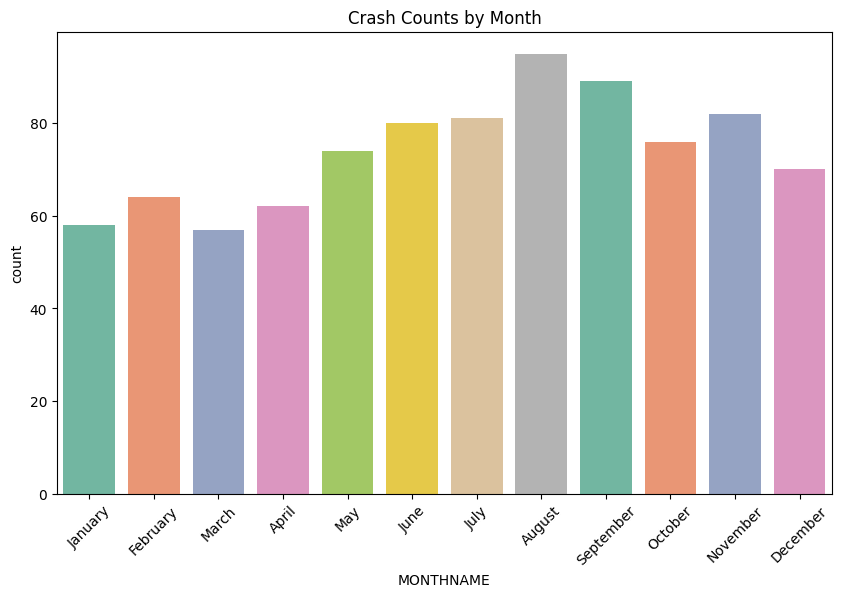

In [ ]:
# 1. Crash counts by month
plt.figure(figsize=(10, 6))
sns.countplot(x='MONTHNAME', data=iowa_fatalities_data, order=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette="Set2")
plt.title('Crash Counts by Month')
plt.xticks(rotation=45)
plt.show()

<ipython-input-142-e94bf57bd667>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




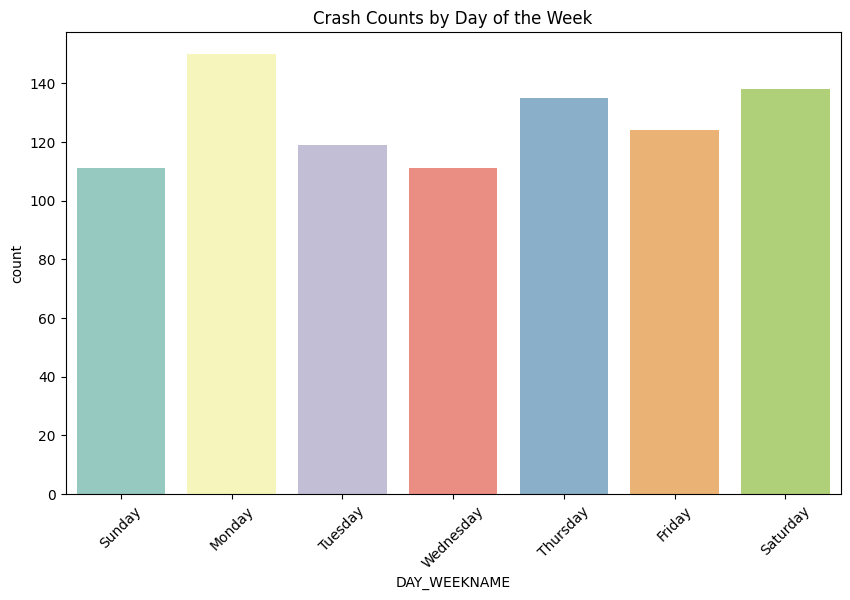

In [ ]:
# 2. Crash counts by day of the week

plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_WEEKNAME', data=iowa_fatalities_data, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], palette="Set3")
plt.title('Crash Counts by Day of the Week')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check for missing values in the 'HOUR' column
missing_hours = iowa_fatalities_data['HOUR'].isna().sum()

# Display how many records are missing the 'HOUR' information
missing_hours

0

<ipython-input-149-d617073ea97c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




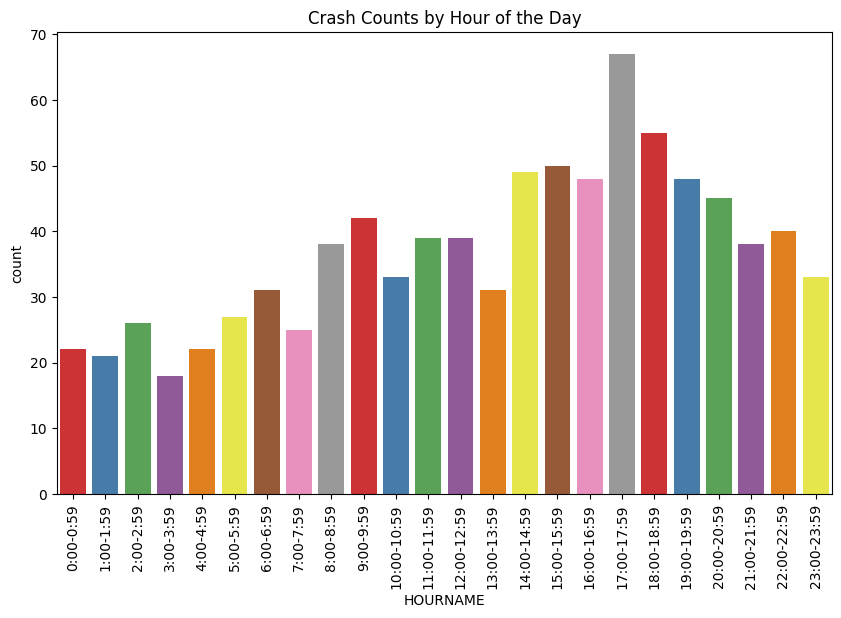

In [ ]:
# 3. Crash counts by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='HOURNAME', data=iowa_fatalities_data, order=[f"{i}:00-{i}:59" for i in range(24)], palette="Set1")
plt.title('Crash Counts by Hour of the Day')
plt.xticks(rotation=90)
plt.show()

<ipython-input-150-577605f66e5d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




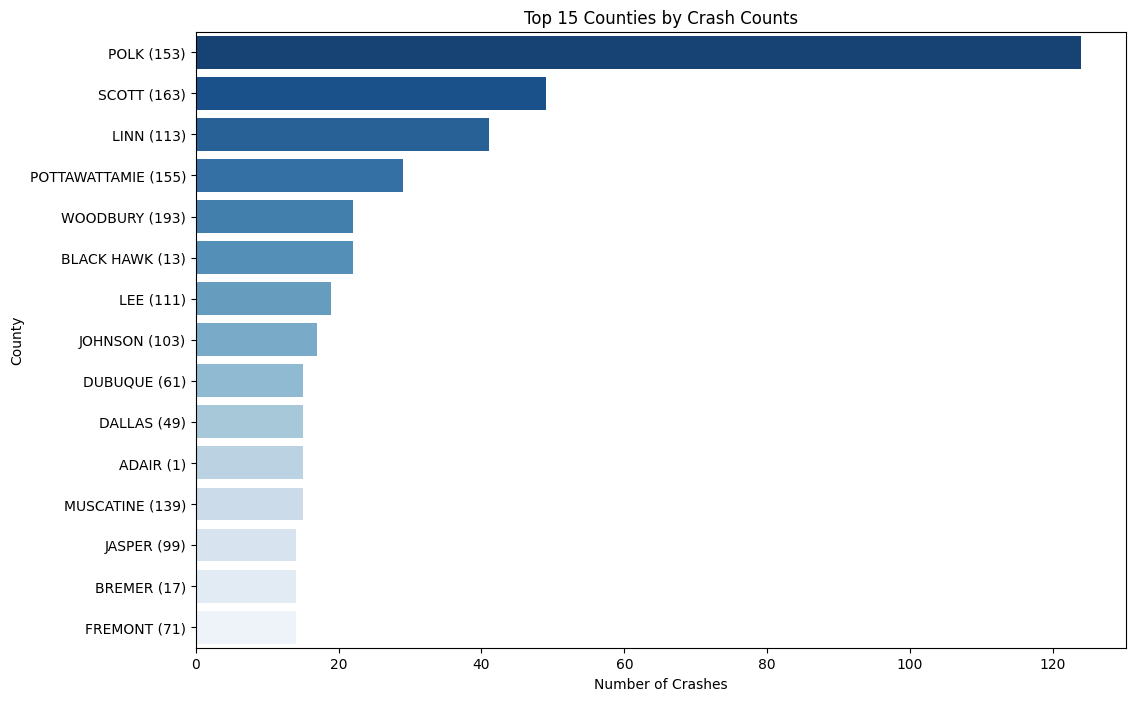

In [ ]:
# Crash counts by county
plt.figure(figsize=(12, 8))
top_counties = iowa_fatalities_data['COUNTYNAME'].value_counts().head(15)  # Show top 15 counties
sns.barplot(x=top_counties.values, y=top_counties.index, palette="Blues_r")
plt.title('Top 15 Counties by Crash Counts')
plt.xlabel('Number of Crashes')
plt.ylabel('County')
plt.show()

In [ ]:
# Re-load and filter the data to ensure everything is defined correctly
iowa_data = data[(data['STATE'] == 19) & (data['FUNC_SYS'].isin([1, 2, 3, 4]))]

# Select the relevant columns
selected_columns = ['FUNC_SYS', 'FATALS', 'VE_TOTAL', 'PEDS', 'PERSONS', 'DRUNK_DR']
iowa_data_filtered = iowa_data[selected_columns].dropna()

# Create the binary target variable (if FATALS > 0, mark it as 1; otherwise, 0)
iowa_data_filtered['FATAL_CRASH'] = (iowa_data_filtered['FATALS'] > 0).astype(int)

# Check the first few rows to confirm everything is correct
iowa_data_filtered.head()


FUNC_SYS  FATALS  VE_TOTAL  PEDS  PERSONS  DRUNK_DR  FATAL_CRASH
13199         1       1         1     0        1       0.0            1
13201         3       1         1     0        5       0.0            1
13203         4       1         1     0        1       0.0            1
13205         1       1         1     0        1       1.0            1
13207         3       1         2     0        3       0.0            1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert FATALS to binary: 1 if FATALS > 0, otherwise 0
iowa_data_filtered['FATAL_CRASH'] = (iowa_data_filtered['FATALS'] > 0).astype(int)

# Define features (X) and target (y)
X = iowa_data_filtered[['FUNC_SYS', 'VE_TOTAL', 'PEDS', 'PERSONS', 'DRUNK_DR']]
y = iowa_data_filtered['FATAL_CRASH']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Check unique classes in predictions
unique_classes = set(y_pred)

# Adjust target names if only one class is predicted
if len(unique_classes) == 1:
    target_names = ["Fatality"] if 1 in unique_classes else ["No Fatality"]  # Use appropriate name based on predicted class
    print("Warning: Only one class predicted. Adjusting target names.")
else:
    target_names = ["No Fatality", "Fatality"]

report = classification_report(y_test, y_pred, target_names=target_names)

accuracy, report

(1.0,
 '              precision    recall  f1-score   support\n\n    Fatality       1.00      1.00      1.00       107\n\n    accuracy                           1.00       107\n   macro avg       1.00      1.00      1.00       107\nweighted avg       1.00      1.00      1.00       107\n')

In [ ]:
# Check the distribution of the target class (FATAL_CRASH)
class_distribution = y.value_counts()

class_distribution

FATAL_CRASH
1    531
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features (X) and target (y) for severity prediction
X = iowa_data_filtered[['FUNC_SYS', 'VE_TOTAL', 'PEDS', 'PERSONS', 'DRUNK_DR']]
y = iowa_data_filtered['FATALS']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

(0.11161942233409135, 0.08617074036767425)

In [ ]:
# Extract feature importances from the trained Random Forest Regressor
importances = regressor.feature_importances_
feature_names = X.columns

# Combine feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
importances, feature_importance_df

(array([0.1805883 , 0.15555177, 0.02433327, 0.45381597, 0.18571069]),
     Feature  Importance
 3   PERSONS    0.453816
 4  DRUNK_DR    0.185711
 0  FUNC_SYS    0.180588
 1  VE_TOTAL    0.155552
 2      PEDS    0.024333)

In [ ]:
print(iowa_data[['YEAR', 'MONTH', 'DAY']].head())
# Changed 'Month' and 'Day' to 'MONTH' and 'DAY' respectively
heatmap_data = iowa_data.pivot_table(index='MONTH', columns='DAY', aggfunc='size', fill_value=0)

       YEAR  MONTH  DAY
13199  2018      1    3
13201  2018      1    4
13203  2018      1    6
13205  2018      1    8
13207  2018      1   12


In [ ]:
# Continue with your heatmap creation:
heatmap_data = iowa_data.pivot_table(index='MONTH', columns='DAY', aggfunc='size', fill_value=0) # Changed 'Month' to 'MONTH'

# ... (rest of your code)

In [ ]:
# Check the available columns in the DataFrame
print(iowa_data.columns)

# If 'CRASH_DATE' is not present, you might need to create it or
# adjust your code to use an existing column with similar information.
# For example, if you have separate columns for year, month, and day,
# you could combine them into a 'CRASH_DATE' column:

# Assuming 'YEAR', 'MONTH', and 'DAY' are existing columns:
iowa_data['CRASH_DATE'] = pd.to_datetime(iowa_data[['YEAR', 'MONTH', 'DAY']])

# Now you can access the 'CRASH_DATE' column:
print(iowa_data[['YEAR', 'MONTH', 'DAY', 'CRASH_DATE']].head())

# Continue with your heatmap creation:
heatmap_data = iowa_data.pivot_table(index='MONTH', columns='DAY', aggfunc='size', fill_value=0)

# ... (rest of your code)

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

<ipython-input-14-6110520810d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iowa_data['CRASH_DATE'] = pd.to_datetime(iowa_data[['YEAR', 'MONTH', 'DAY']])


<ipython-input-24-383473f617b9>:11: DtypeWarning: Columns (40,42,62,64,84,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/combined_accidents.csv")
<ipython-input-24-383473f617b9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iowa_data['CRASH_DATE'] = pd.to_datetime(iowa_data[['YEAR', 'MONTH', 'DAY']])
<ipython-input-24-383473f617b9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iowa_data['Year'] = iowa_data['CRASH_DATE'].d

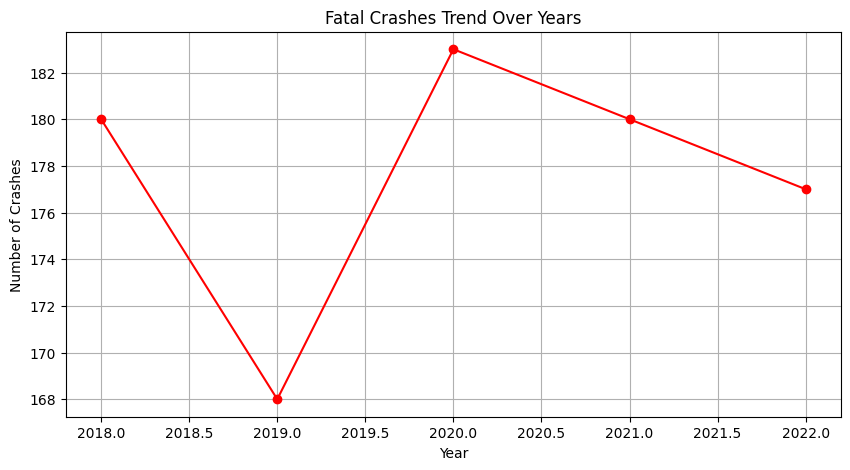

<ipython-input-24-383473f617b9>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iowa_data['Day'] = iowa_data['CRASH_DATE'].dt.day


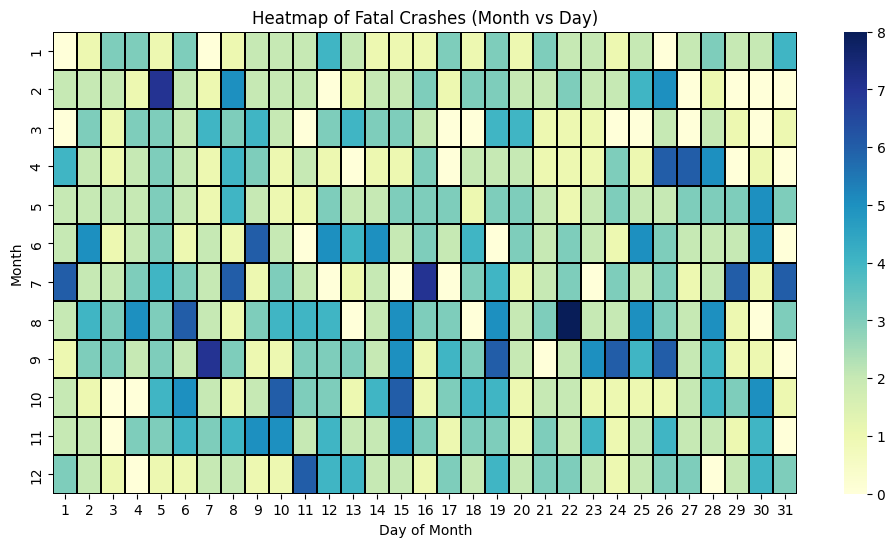

In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Read the dataset
data = pd.read_csv("/content/drive/MyDrive/combined_accidents.csv")

# Filter Iowa data with functional classes 1, 2, 3, and 4
iowa_data = data[(data['STATE'] == 19) & (data['FUNC_SYS'].isin([1, 2, 3, 4]))]

# Assuming you have 'YEAR', 'MONTH', and 'DAY' columns, create 'CRASH_DATE'
# If you have a different date column, replace 'YEAR', 'MONTH', 'DAY' accordingly.
iowa_data['CRASH_DATE'] = pd.to_datetime(iowa_data[['YEAR', 'MONTH', 'DAY']])

# Ensure date columns are properly formatted (Assuming a date column like 'CRASH_DATE')
# This line is now redundant as 'CRASH_DATE' is already a datetime object
# iowa_data['CRASH_DATE'] = pd.to_datetime(iowa_data['CRASH_DATE'], errors='coerce')

# Extract year and month for time-based analysis
iowa_data['Year'] = iowa_data['CRASH_DATE'].dt.year
iowa_data['Month'] = iowa_data['CRASH_DATE'].dt.month

# 1. Plotting Crash Trends Over Time (Yearly)
plt.figure(figsize=(10, 5))
yearly_trend = iowa_data.groupby('Year').size()
yearly_trend.plot(kind='line', marker='o', color='red')
plt.title('Fatal Crashes Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

# 2. Crash Heatmap (Month vs. Day)
iowa_data['Day'] = iowa_data['CRASH_DATE'].dt.day
heatmap_data = iowa_data.pivot_table(index='Month', columns='Day', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.1, linecolor='black')
plt.title('Heatmap of Fatal Crashes (Month vs Day)')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()




In [ ]:
print(iowa_data['Year'].unique())

[2018 2019 2020 2021 2022]


In [ ]:
crashes_per_year = iowa_data.groupby('Year').size()
print(crashes_per_year)

Year
2018    180
2019    168
2020    183
2021    180
2022    177
dtype: int64


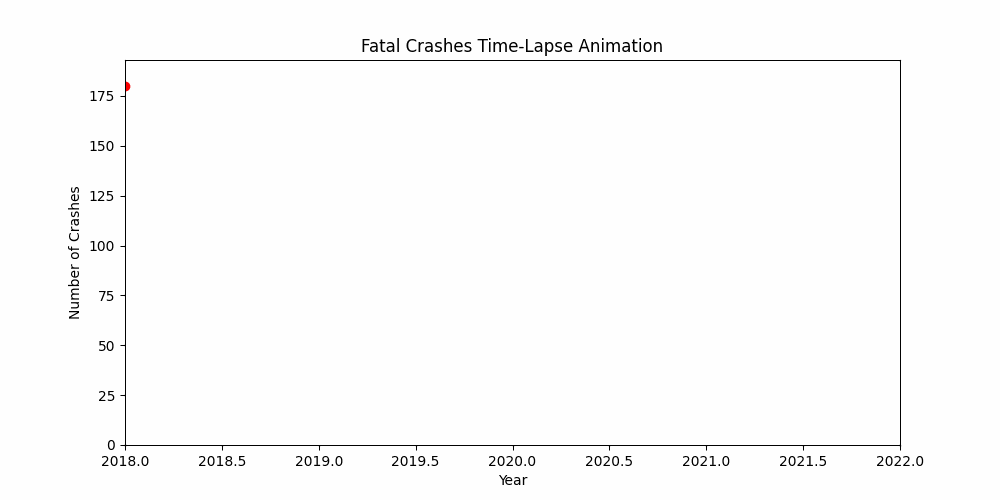

In [ ]:
from IPython.display import Image
Image(filename='crash_animation.gif')

In [ ]:
# Install necessary libraries
!pip install pandas folium

# Import libraries
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset (assuming it's uploaded to Colab or locally accessible)
accident_data = pd.read_csv('/content/drive/MyDrive/combined_accidents.csv', encoding='latin1')

# Filter for Iowa data (State code: 19)
iowa_data = accident_data[accident_data['STATENAME'] == 'Iowa']

# Filter for arterial roads (functional classes 1, 2, 3, 4)
iowa_arterial_data = iowa_data[iowa_data['FUNC_SYS'].isin([1, 2, 3, 4])]

# Filter for fatalities
iowa_fatalities_data = iowa_arterial_data[iowa_arterial_data['FATALS'] > 0]

# Extract latitudes and longitudes, dropping missing values
latitudes = iowa_fatalities_data['LATITUDE'].dropna()
longitudes = iowa_fatalities_data['LONGITUD'].dropna()

# Calculate the center of the map
center_lat = latitudes.mean()
center_lon = longitudes.mean()

# Create a Folium map centered on the average location
m = folium.Map(location=[center_lat, center_lon], zoom_start=7)

# Prepare heatmap data, ensuring only valid latitude/longitude pairs are used
heat_data = [
    [row['LATITUDE'], row['LONGITUD']]
    for _, row in iowa_fatalities_data.iterrows()
    if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUD'])
]

# Add the heatmap layer to the map
HeatMap(heat_data).add_to(m)

# Display the map
m


<ipython-input-38-ebd56a7d13df>:10: DtypeWarning: Columns (40,42,62,64,84,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_data = pd.read_csv('/content/drive/MyDrive/combined_accidents.csv', encoding='latin1')


In [ ]:
import folium
from folium.plugins import HeatMapWithTime

# Step 1: Prepare data for heatmap animation
# Group data by month and extract the required fields
time_lapse_data = iowa_fatalities_data[['LATITUDE', 'LONGITUD', 'YEAR', 'MONTH']]

# Convert the Date fields into a time-series index
time_lapse_data['Date'] = pd.to_datetime(time_lapse_data[['YEAR', 'MONTH']].assign(DAY=1))

# Create a list of heatmap points by month
time_groups = time_lapse_data.groupby('Date')
heatmap_data = [[
    [row['LATITUDE'], row['LONGITUD']] for index, row in group.iterrows()
] for name, group in time_groups]

# Step 2: Generate the base map
m = folium.Map(location=[41.878, -93.097], zoom_start=7)

# Step 3: Create the HeatMapWithTime
HeatMapWithTime(heatmap_data).add_to(m)

# Step 4: Display the map
m

<ipython-input-41-5425d8a2b145>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_lapse_data['Date'] = pd.to_datetime(time_lapse_data[['YEAR', 'MONTH']].assign(DAY=1))


In [41]:
import pandas as pd
import plotly.express as px

# Load the dataset
FARS_Data = pd.read_csv('/content/drive/MyDrive/combined_accidents.csv')

# Create a time-related column (e.g., extract hour from HOURNAME)
FARS_Data['Hour'] = pd.to_numeric(FARS_Data['HOUR'], errors='coerce')

# Group crashes by hour and weather
crash_patterns = FARS_Data.groupby(['Hour', 'WEATHERNAME']).size().reset_index(name='Count')

# Ensure all categories are included
all_weather = FARS_Data['WEATHERNAME'].unique()

# Create an animated scatter plot using Plotly Express
fig = px.scatter(
    crash_patterns,
    x='Hour',
    y='Count',
    animation_frame='Hour',
    animation_group='WEATHERNAME',
    color='WEATHERNAME',
    size='Count',
    category_orders={'WEATHERNAME': all_weather},
    title='Time-Lapse of Crashes by Hour and Weather',
    range_x=[0, 23],
    range_y=[0, crash_patterns['Count'].max() + 10],
    labels={'Hour': 'Hour of Day', 'Count': 'Number of Crashes'}
)

# Display the plot in Colab
fig.show()


<ipython-input-41-930c2242162f>:5: DtypeWarning: Columns (40,42,62,64,84,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  FARS_Data = pd.read_csv('/content/drive/MyDrive/combined_accidents.csv')
